In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
x_train = []
y_train = []

In [4]:
import os, cv2
x_train = []
y_train = []
for fileName in os.listdir("dataset/"):
    label = fileName[0]
    y_train.append(int(label))
    img = cv2.imread("dataset/"+fileName,cv2.IMREAD_GRAYSCALE);
    resized = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)
    im_bw = cv2.threshold(resized, 127, 255, cv2.THRESH_BINARY)[1]
    x_train.append(im_bw)

In [5]:
target_onehot = []
for label in y_train:
    ohetgt = [0 for _ in range(9)]
    ohetgt[label-1] = 1
    target_onehot.append(ohetgt)

In [6]:

data = np.array(x_train,dtype="float32")
target = np.array(target_onehot,dtype="float32")

In [7]:
data = data.reshape((data.shape[0],28,28,1))

In [8]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.5,
        zoom_range=0.1,
        rescale=1./255)


In [9]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(64, (3, 3),input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [10]:
datagen.fit(data)

In [11]:
epochs =3000
batch_size=20
history = model.fit(datagen.flow(data, target, batch_size=batch_size),
        epochs=epochs, verbose=0)

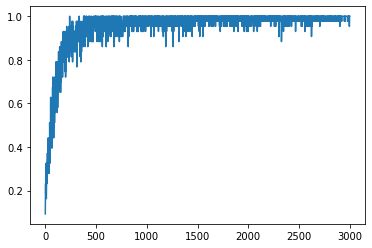

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='MAE (training data)')
plt.show()

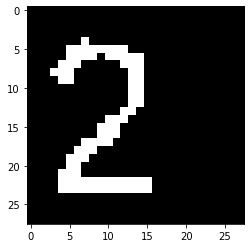

In [13]:
plt.imshow(x_train[9],cmap="gray")

In [14]:
x_train = np.array(x_train)
val_results = model.predict(x_train.reshape(x_train.shape[0],28,28,1)/255)
correct = 0
for res, tgt in zip(val_results,y_train):
    ohetgt = [0 for _ in range(9)]
    ohetgt[tgt-1] = 1
    if(np.argmax(res)==np.argmax(ohetgt)):
        correct+=1
print("accuracy:",correct,"out of",data.shape[0],"correct")

accuracy: 43 out of 43 correct


(1, 28, 28, 1)
4


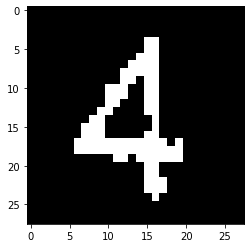

In [17]:
idx = 20
print(np.array([data[idx]]).shape)
res = model.predict(np.array([data[idx]])/255)
test = data[idx].reshape((28,28))
plt.imshow(test,cmap="gray")
print(np.argmax(res)+1)

In [16]:
model.save("model.h5")